# <span style="color:blue">Programming for Data Science - DS-GA 1007</span>
## <span style="color:blue">Assignment 7: Pandas - Part II</span>
---

For this homework you will need the data sets (available in the same .zip file as this notebook)

- countries.csv
- gdp_per_capita_ppp.csv

### Question 1: (1.5 point) 
Read the file "gdp\_per\_capita\_ppp.csv" and transform it in a DataFrame with rows indexed by years and columns by country namens. Print the first 10 years (rows) and the five first countries (columns) in the generated dataframe.<br>
__Hint:__ Use the _transpose_ and _iloc_ operators.

In [371]:
import pandas as pd
import numpy as np
df=pd.read_csv('/Users/yuqidai/Downloads/Assignment_7 Pandas II/gdp_per_capita_ppp.csv')
df.set_index('GDP per capita',inplace=True)
df=df.transpose()
print(df.iloc[0:10,0:5])

GDP per capita  Abkhazia  Afghanistan  Akrotiri and Dhekelia     Albania  \
1800                 NaN     472.0535                    NaN  601.215222   
1801                 NaN          NaN                    NaN         NaN   
1802                 NaN          NaN                    NaN         NaN   
1803                 NaN          NaN                    NaN         NaN   
1804                 NaN          NaN                    NaN         NaN   
1805                 NaN          NaN                    NaN         NaN   
1806                 NaN          NaN                    NaN         NaN   
1807                 NaN          NaN                    NaN         NaN   
1808                 NaN          NaN                    NaN         NaN   
1809                 NaN          NaN                    NaN         NaN   

GDP per capita     Algeria  
1800            766.253664  
1801                   NaN  
1802                   NaN  
1803                   NaN  
1804              

### Question 2: (2.0 points) 
Still considering the file "gdp_per_capita_ppp.csv", graphically display the curve _year_ $\times$ _GDP_ for the three countries with the largest sum of GDP over the whole set of years. 

In [350]:
sumGDP=df.sum()
x=sumGDP.sort_values(ascending=False)[:3]
x=list(x.index)
df1=df.loc[:,x]
indexlist=[]
for i in df1.index:
    indexlist.append(int(i))

Text(0.5,0,'Year')

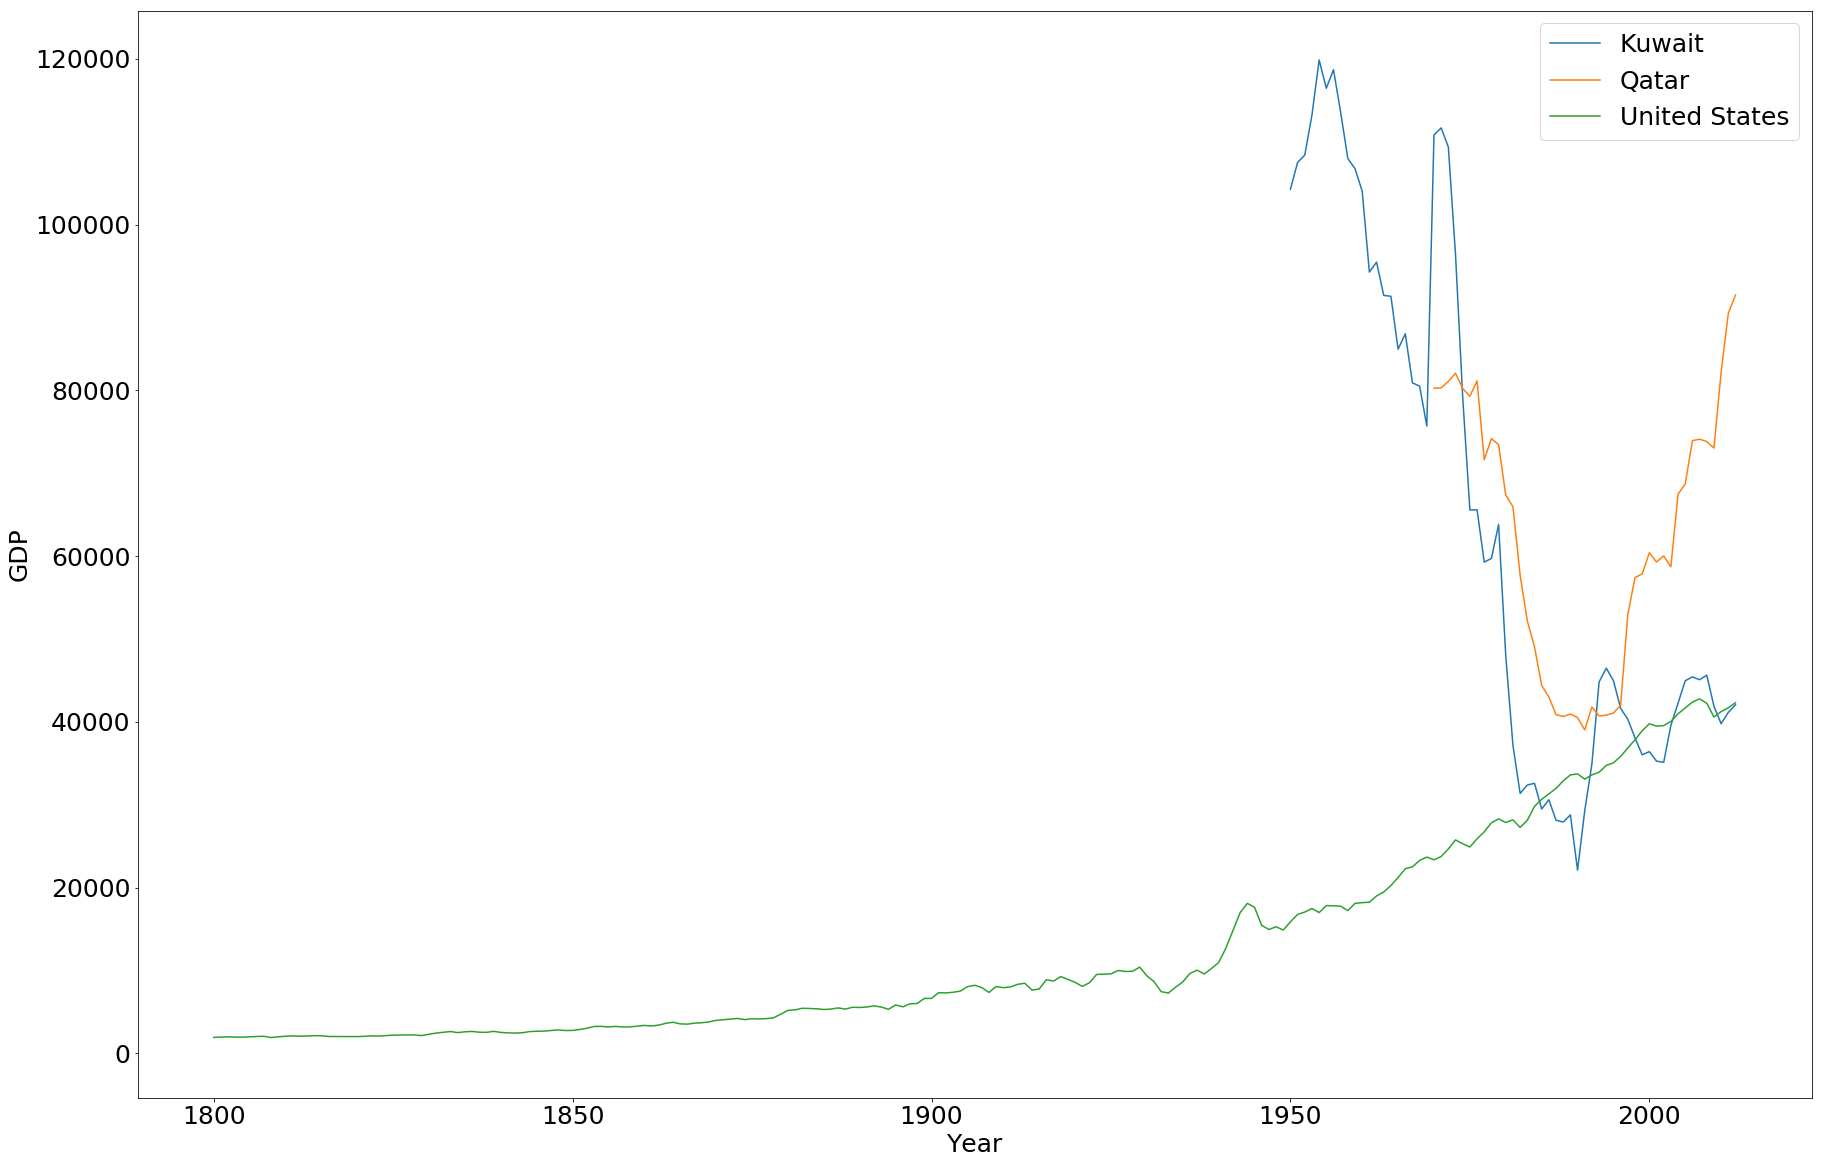

In [351]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
fig.set_size_inches(30,20)
for i in df1.columns:
    plt.plot(indexlist,df1[i],label=i)
    plt.yticks(fontsize=25)
    plt.xticks(fontsize=25)
plt.legend(fontsize=25)
plt.ylabel('GDP',fontsize=25)
plt.xlabel('Year',fontsize=25)

# Solution 

### Question 3: (2.0 points) 
Still considering the file "gdp_per_capita_ppp.csv", print the name of all countries (if any) that contains no NaNs in their GDP series, that is, no missing data. Graphically display the series for those countries.

Austria
Bangladesh
Belgium
China
Denmark
Finland
France
Germany
Greece
India
Iran
Iraq
Ireland
Italy
Japan
Korea, Dem. Rep.
Korea, Rep.
Myanmar
Netherlands
Norway
Pakistan
Poland
Portugal
Spain
Sweden
Switzerland
Syria
Taiwan
Turkey
United Kingdom
United States


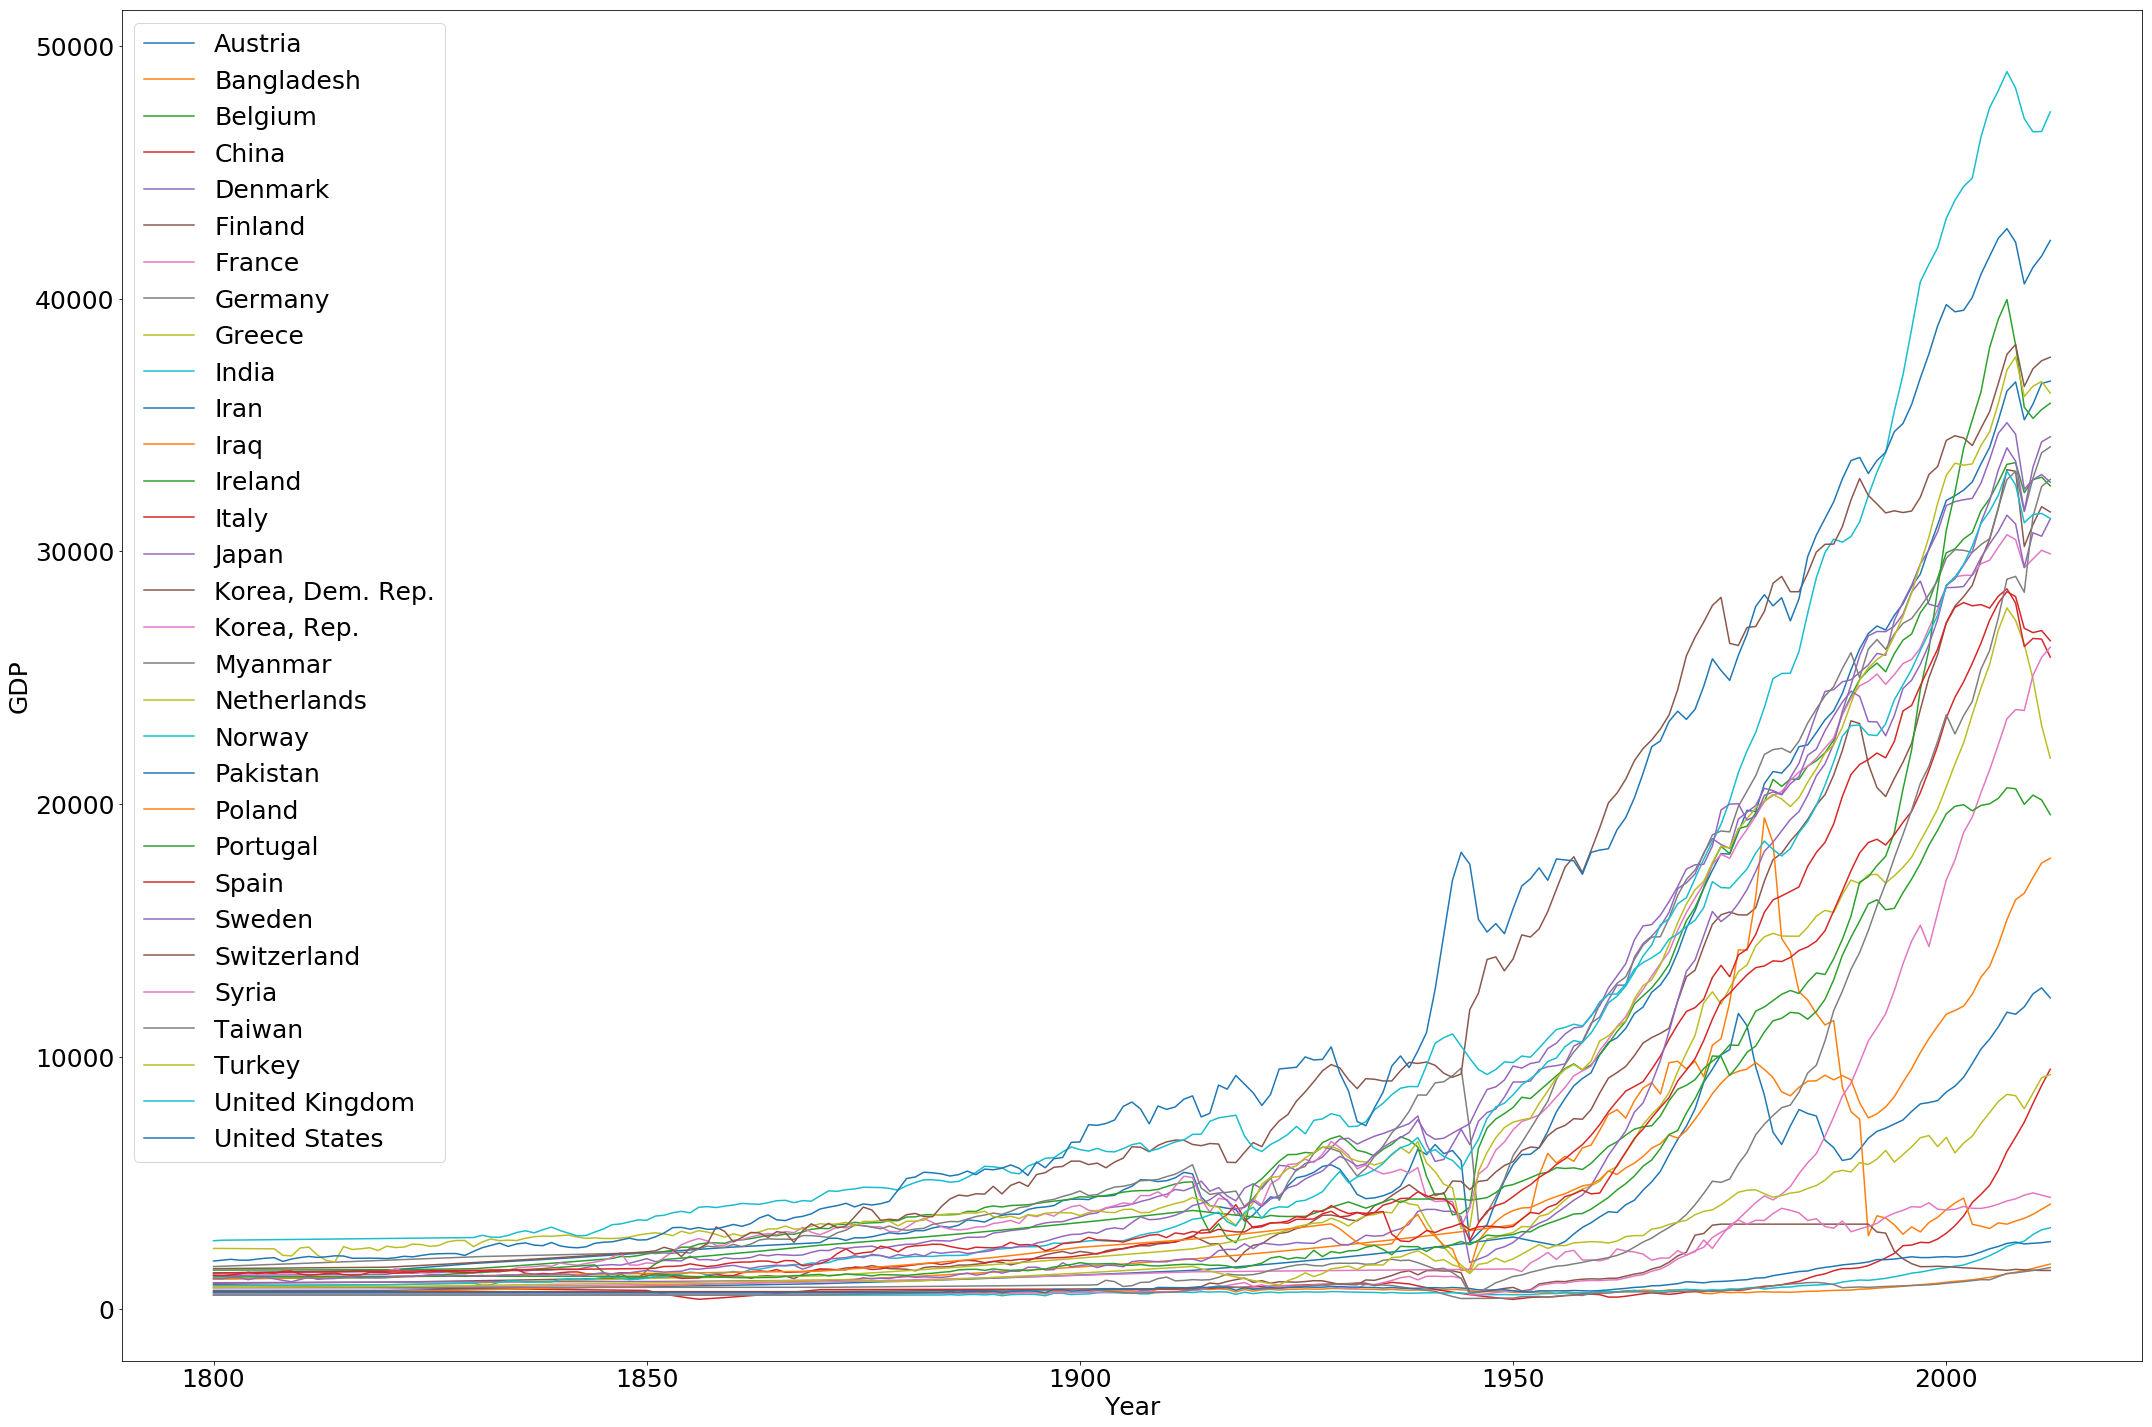

In [360]:
# solution 
df2=df.dropna(axis=1)
for i in list(df2.columns):
    print(i)
fig=plt.figure()
fig.set_size_inches(30,20)
for i in df2.columns:
    plt.plot(indexlist,df2[i],label=i)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
plt.ylabel('GDP',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.legend(fontsize=25)
fig.tight_layout()

### Question 4: (3.0 points) 
Read the file "countries.csv" and create a DataFrame with rows indexed by the country names. The DataFrame must contain the columns "Life expectancy", "Population", and "Average GDP". This DataFrame must be a _merge_ of proper columns from "countries.csv", with the column "Average GDP" computed from the file "gdp_per_capita_ppp.csv". Print the ten first rows from the created DataFrame.
Hint: Use pd.mean to generate the "Average GDP" column. Replace NaN by zero when computing the average value.

In [372]:
# solution
df4=pd.read_csv('/Users/yuqidai/Downloads/Assignment_7 Pandas II/countries.csv',delimiter=';')
df4.set_index('Country (en)',inplace=True)
df5=df4.iloc[:,[5,14]]
df.fillna(value=0,inplace=True)
df_mean=pd.DataFrame(df.mean())
result=pd.merge(df5,df_mean,right_on=df_mean.index,left_on=df5.index,how='inner')
result.rename(columns={'key_0':'Country',0:'Average GDP'},inplace=True)
result.set_index('Country',inplace=True)
print(result.head(10))

                     Population  Life expectancy  Average GDP
Country                                                      
Afghanistan            33332025             51.3   253.178379
Egypt                  94666993             72.7   968.800181
Albania                 3038594             78.3  1070.687629
Algeria                40263711             76.8  1376.309984
American Samoa            54194             75.4   288.560238
Andorra                   85660             82.8  6122.977503
Angola                 20172332             56.0  1095.175787
Anguilla                  16752             81.4  2443.739395
Antigua and Barbuda       93581             76.5  2031.872558
Equatorial Guinea        759451             64.2   929.117090


### Question 5: (1.5 points) 
Sort the DataFrame created in Question 4 in decreasing order acording to the column "Average GDP" and make a scatter plot of "Population" $\times$ "Life expectancy" for the 100 first countries in the sorted list. Apply the logarithm function to the column "Population" before generating the plot. Normalize the "Average GDP" and scale the plotted points according to the normalized "Average GDP" (the size of the points must change according to the normalized data). Your plot should be similar to the following one:
![title](dfscatter.png)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5,0,'Population')

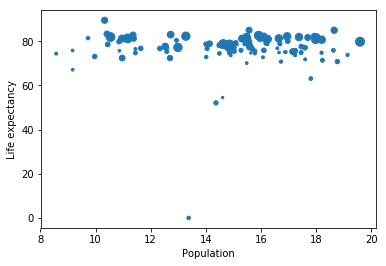

In [328]:
# solution
index=result['Average GDP'].sort_values(ascending=False)[:100].index
output=result.iloc[index,:]
output.iloc[:,1]=np.log(output.iloc[:,1])
x3=output.iloc[:,3]
norm_x3=(x3-x3.min())/(x3.max()-x3.min())
output.iloc[:,3]=norm_x3
plt.scatter(output.loc[:,('Population')],output.loc[:,('Life expectancy')],s=120*(0.05+output.loc[:,('Average GDP')]))
plt.ylabel('Life expectancy')
plt.xlabel('Population')